In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.stats as stats

In [2]:
# Data Generation
truelambda1 = 1
truelambda2 = 3
N = 5

data = np.concatenate([stats.poisson.rvs(truelambda1,size=(N,1)),stats.poisson.rvs(truelambda2,size=(N,1))],axis=1)
data

array([[1, 5],
       [0, 3],
       [2, 2],
       [1, 1],
       [0, 4]])

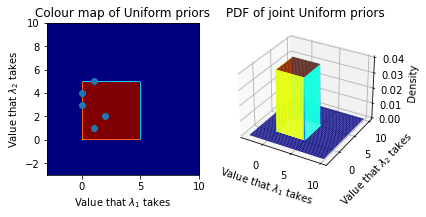

In [3]:
# We have paired data points that we suspect come from a joint Poisson distribution with parameters lambda1 and lambda2 respectively
# Consider uniform priors from 0 to 5
x = y = np.linspace(-3,10,100)
X,Y = np.meshgrid(x,y)
unix = stats.uniform.pdf(x,0,5)
uniy = stats.uniform.pdf(y,0,5)

joint = np.dot(unix[:,None],uniy[None,:])

fig = plt.figure()
fig.add_subplot(121)
plt.title("Colour map of Uniform priors")
plt.imshow(joint,cmap=plt.cm.jet,extent=(-3,10,-3,10), origin="lower")
plt.scatter([data[i][0] for i in range(N)],[data[i][1] for i in range(N)])
plt.xlabel("Value that $\lambda_1$ takes")
plt.ylabel("Value that $\lambda_2$ takes")

ax = fig.add_subplot(122, projection="3d")
plt.title("PDF of joint Uniform priors")
ax.plot_surface(X,Y,joint,cmap=plt.cm.jet)
plt.xlabel("Value that $\lambda_1$ takes")
plt.ylabel("Value that $\lambda_2$ takes")
ax.set_zlabel("Density")
plt.show()

In [4]:
# To calculate the posterior, I use the definitions of conditional pdfs
# p(theta|y) = p(y|theta)p(theta)/p(y)
# p(theta) held in joint variable in [-5,10]^2
# p(y|theta) tells us the joint density of (Y1,Y2) at (y1,y2) given theta
# Want a matrix telling us for each of those points in [-5,10]^2 what the joint probability of seeing y is.

likelihood = np.zeros((len(x),len(y)))

for index1, lambda1 in enumerate(y):
    for index2, lambda2 in enumerate(x):
        if (lambda1 > 0) and (lambda2 > 0):
            likelihood[index1][index2] = np.asarray([stats.poisson.pmf(data[:,0],lambda1)]).prod(axis=1)*np.asarray([stats.poisson.pmf(data[:,1],lambda2)]).prod(axis=1)
likelihood.shape

(100, 100)

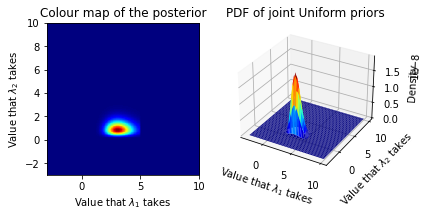

In [5]:
fig = plt.figure()
fig.add_subplot(121)
plt.title("Colour map of the posterior")
plt.imshow(likelihood*joint,cmap=plt.cm.jet,extent=(-3,10,-3,10),origin="lower")
plt.xlabel("Value that $\lambda_1$ takes")
plt.ylabel("Value that $\lambda_2$ takes")

ax = fig.add_subplot(122, projection="3d")
plt.title("PDF of joint Uniform priors")
ax.plot_surface(X,Y,likelihood*joint,cmap=plt.cm.jet)
plt.xlabel("Value that $\lambda_1$ takes")
plt.ylabel("Value that $\lambda_2$ takes")
ax.set_zlabel("Density")
plt.show()